### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, roc_curve, precision_recall_curve, f1_score
from sklearn.model_selection import RandomizedSearchCV
import joblib

### Reading Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/pik1989/MLProject-ChurnPrediction/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv")

### Basic Data Inspection

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Data Cleaning

Droping **customerID** as it does not provide value in EDA or Model building.

In [ ]:
df1 = df.copy()

In [ ]:
df1.drop("customerID", axis=1, inplace=True)

In [ ]:
df1.shape

(7043, 20)

Converting **TotalCharges** to numeric.

In [ ]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors="coerce")

In [ ]:
df1['TotalCharges'].isnull().sum()

np.int64(11)

In [ ]:
df1[df1['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Filling missing **TotalCharges** with 0 (these are new customers with tenure=0)

In [ ]:
df1['TotalCharges'].fillna(0, inplace=True)

/tmp/ipython-input-1164946245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['TotalCharges'].fillna(0, inplace=True)


In [ ]:
df1['TotalCharges'].isnull().sum()

np.int64(0)

In [ ]:
df1['TotalCharges'].dtype

dtype('float64')

Converting **SeniorCitizen** from numeric to categorical.

In [ ]:
df1['SeniorCitizen'] = df1['SeniorCitizen'].map({0: "No", 1: "Yes"})

In [ ]:
df1['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df1['SeniorCitizen'].isnull().sum()

np.int64(0)

In [ ]:
obj_col = df1.select_dtypes(include="object")
for col in obj_col:
  uni_val = df1[col].unique()
  print(f"Unique values in {col} : {uni_val}")

Unique values in gender : ['Female' 'Male']
Unique values in SeniorCitizen : ['No' 'Yes']
Unique values in Partner : ['Yes' 'No']
Unique values in Dependents : ['No' 'Yes']
Unique values in PhoneService : ['No' 'Yes']
Unique values in MultipleLines : ['No phone service' 'No' 'Yes']
Unique values in InternetService : ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity : ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup : ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection : ['No' 'Yes' 'No internet service']
Unique values in TechSupport : ['No' 'Yes' 'No internet service']
Unique values in StreamingTV : ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies : ['No' 'Yes' 'No internet service']
Unique values in Contract : ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling : ['Yes' 'No']
Unique values in PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Uniq

collapsing No phone service → "No" (because if no phone, multiple lines = no).

In [ ]:
df1['MultipleLines'] = df1['MultipleLines'].replace("No phone service", "No")

In [ ]:
df1['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

collapsing No internet service -> No

In [ ]:
internet_cols = [
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

for col in internet_cols:
  df1[col] = df1[col].replace("No internet service", "No")

In [ ]:
for col in internet_cols:
  uni_val = df1[col].unique()
  print(f"Unique values in {col} : {uni_val}")

Unique values in OnlineSecurity : ['No' 'Yes']
Unique values in OnlineBackup : ['Yes' 'No']
Unique values in DeviceProtection : ['No' 'Yes']
Unique values in TechSupport : ['No' 'Yes']
Unique values in StreamingTV : ['No' 'Yes']
Unique values in StreamingMovies : ['No' 'Yes']


### Exploratory Data Analysis

In [ ]:
df1['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
(df1['Churn'].value_counts() / len(df1['Churn'])) * 100

,count
Churn,
No,73.463013
Yes,26.536987


Churn = 26.5%

No Churn = 73.5%

This is class imbalance → not extreme, but important.

In [ ]:
num_cols = df1.select_dtypes(exclude='object').columns

In [ ]:
cat_cols = df1.select_dtypes(include='object').columns

### UniVariate Analysis

In [ ]:
def num_uni_analysis(df,col):
  sns.histplot(data=df, x=col, kde=True)
  plt.title(f"Distribution of {col}")
  plt.xlabel(col)
  plt.show()

  sns.boxplot(data=df, x=col)
  plt.title(f"BoxPlot of {col}")
  plt.xlabel(col)
  plt.show()

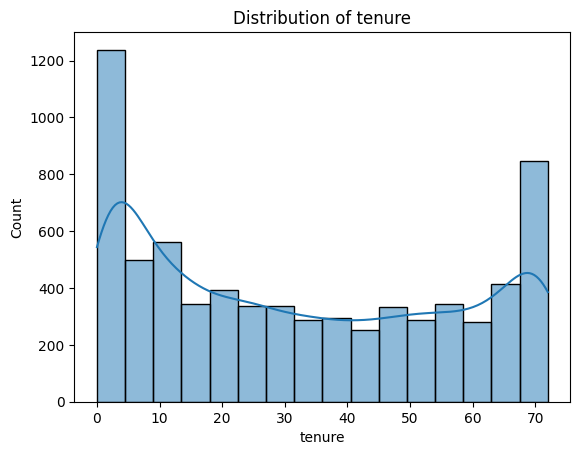

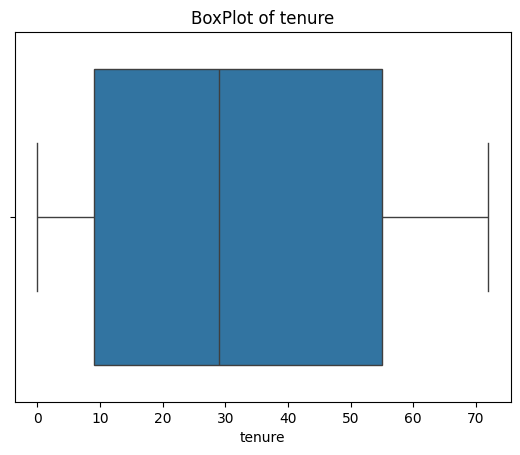

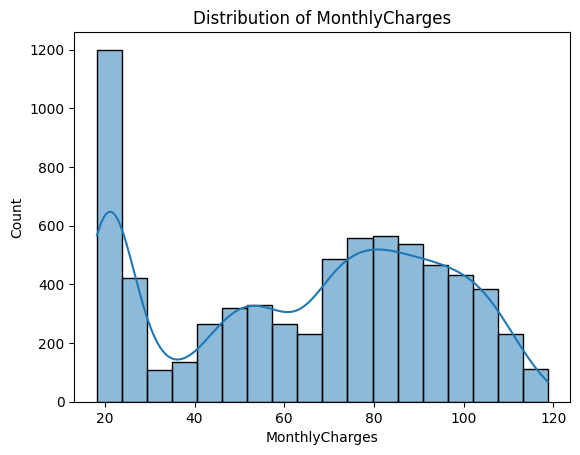

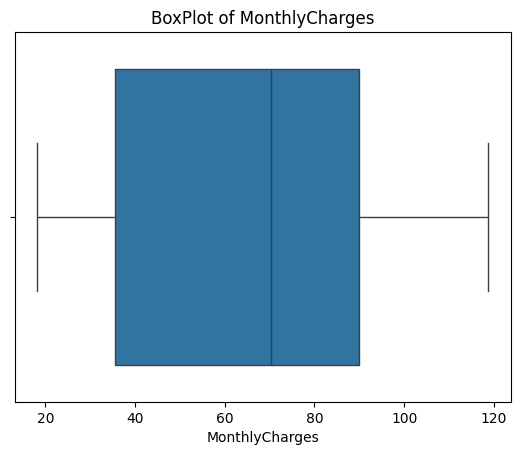

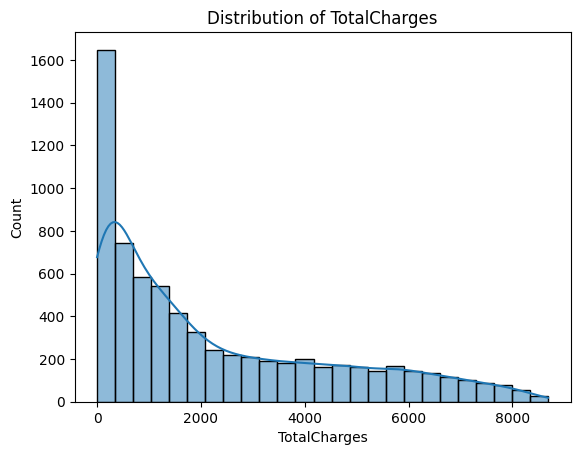

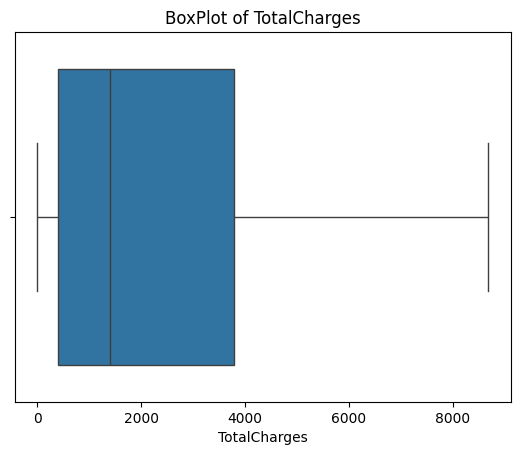

In [ ]:
for col in num_cols:
  num_uni_analysis(df1,col)

In [ ]:
def cat_uni_analysis(df,col):
  sns.countplot(data=df, y=col, hue=col, legend=False, order=df[col].value_counts().index)
  plt.title(f"Total Count for each category of {col}")
  plt.ylabel(col)
  plt.show()

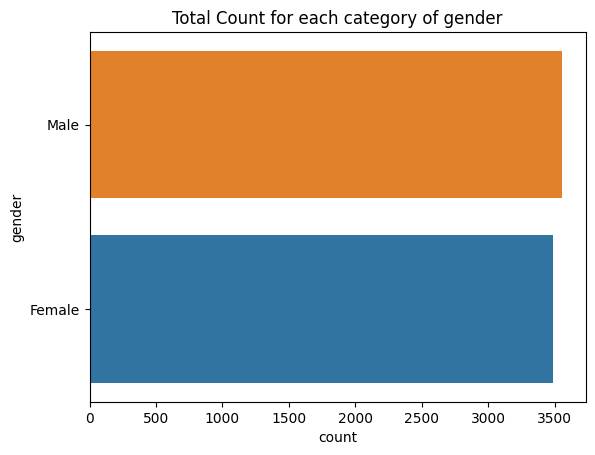

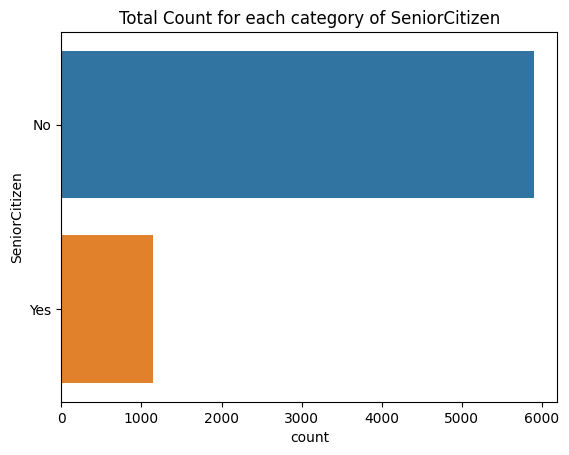

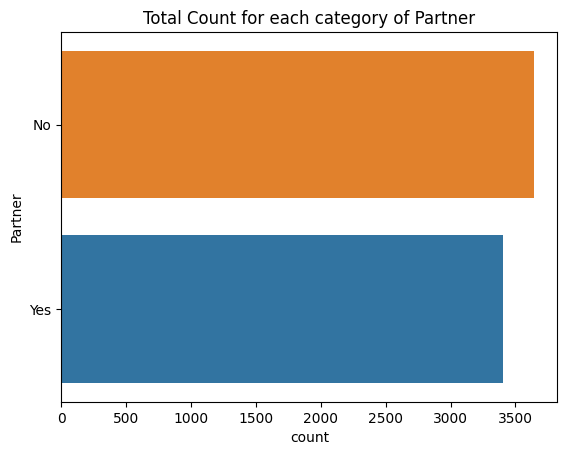

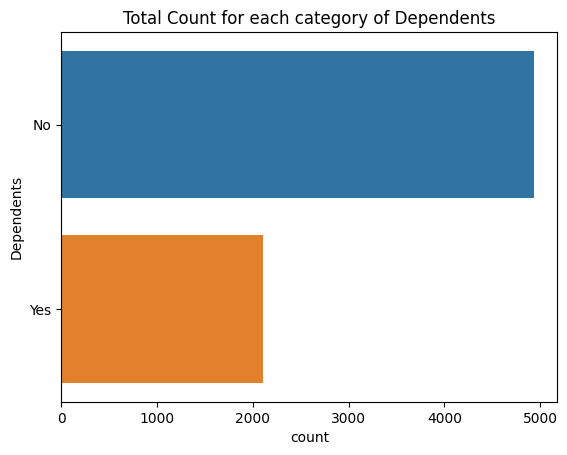

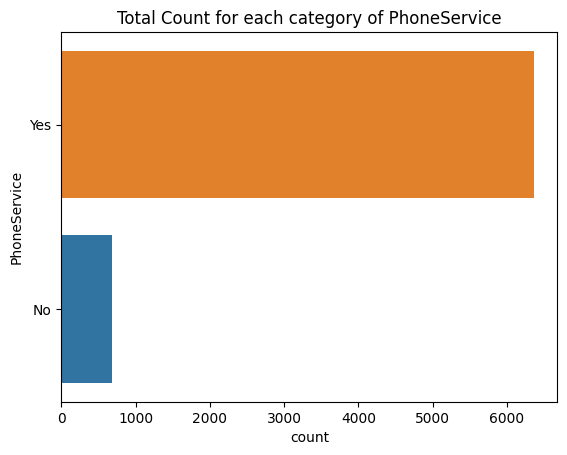

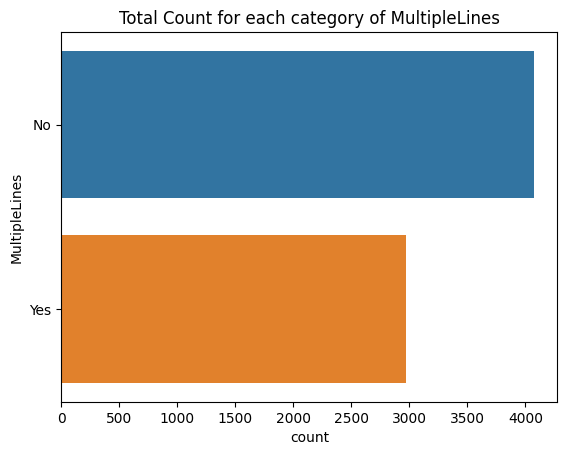

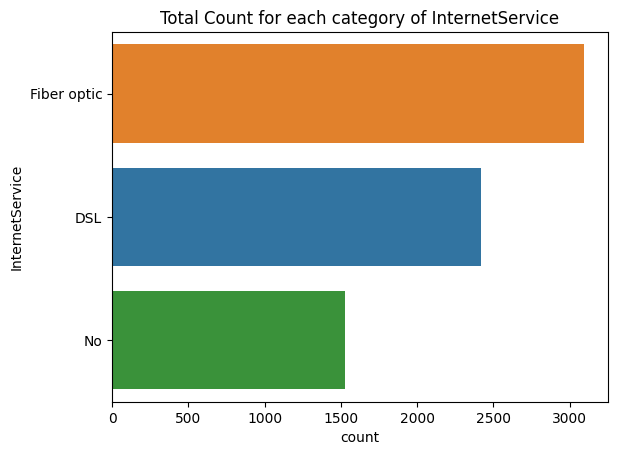

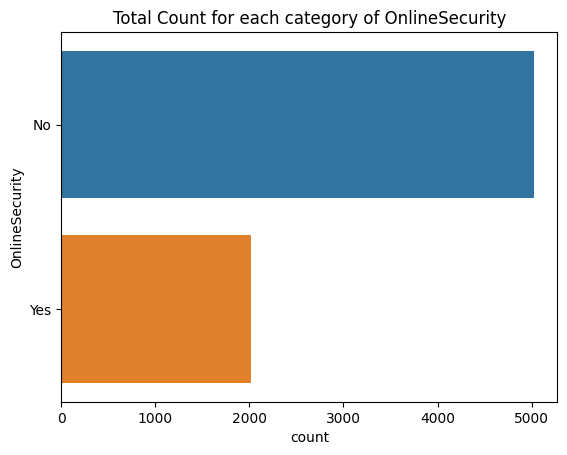

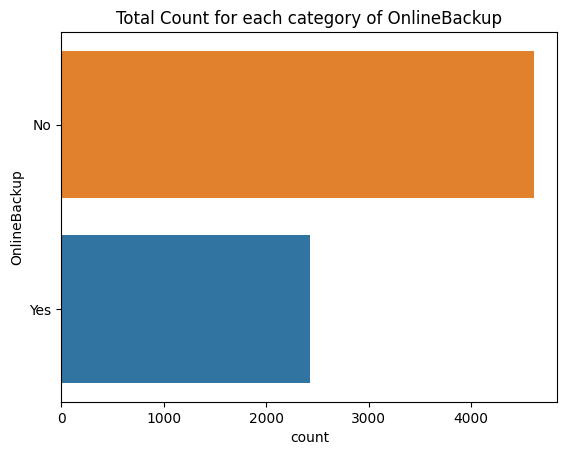

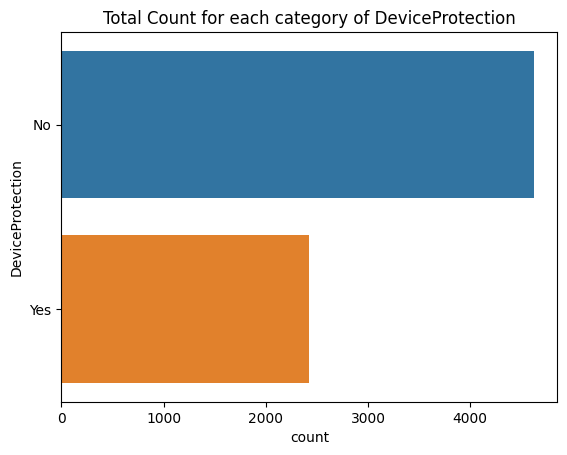

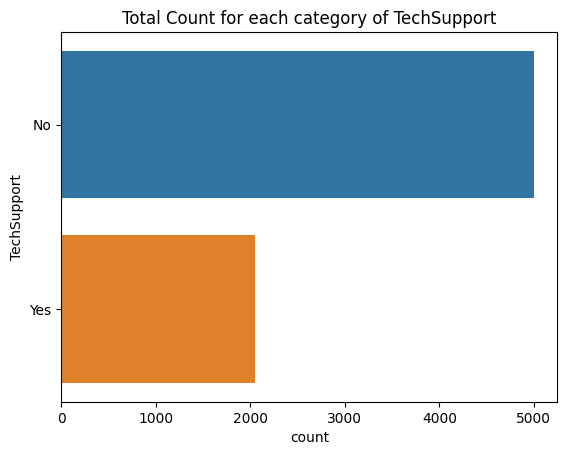

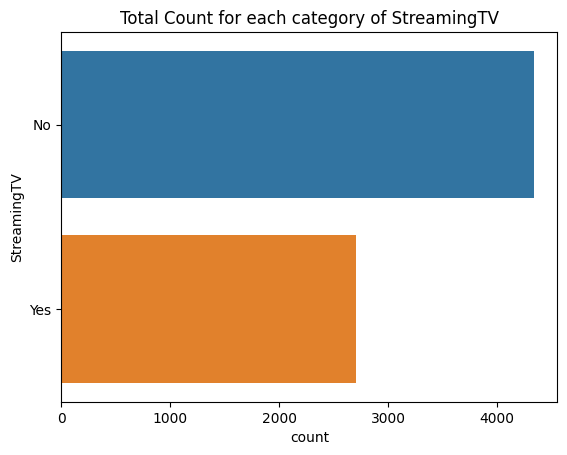

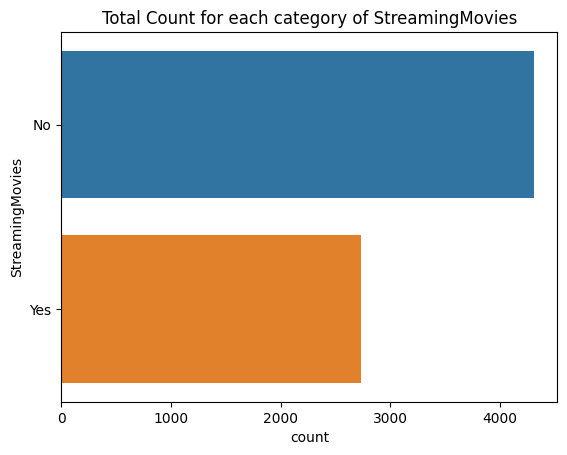

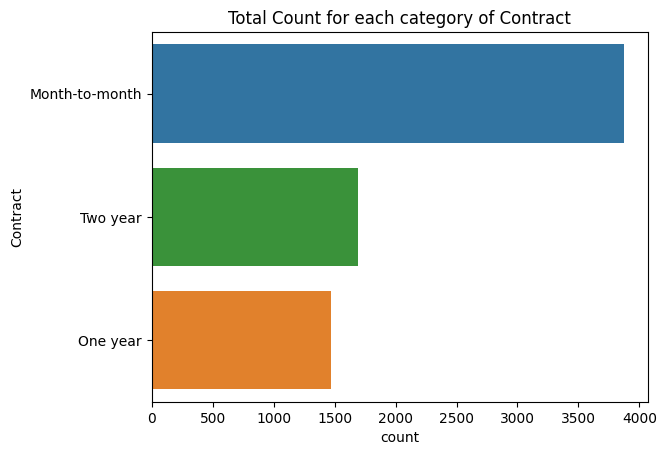

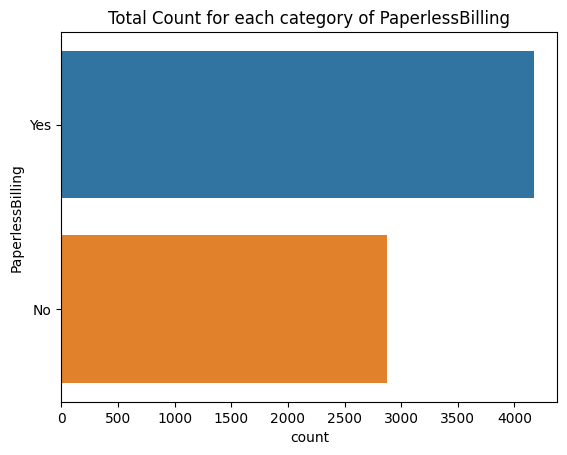

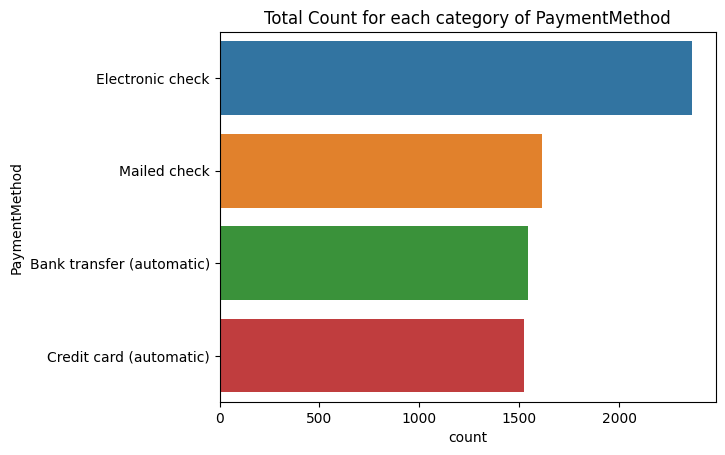

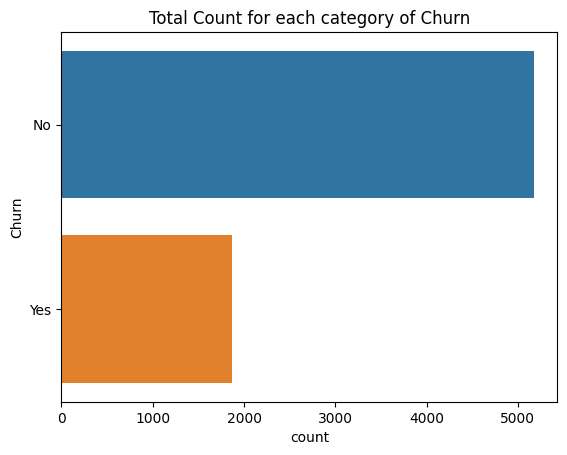

In [ ]:
for col in cat_cols:
  cat_uni_analysis(df1,col)

### BiVariate Analysis

In [ ]:
def num_bi_analysis(df,col,target):
  sns.kdeplot(data=df, x=col, hue=target, fill=True)
  plt.title(f"Distribution of {col} by {target}")
  plt.xlabel(col)
  plt.show()

  sns.boxplot(data=df, x=target, y=col)
  plt.title(f"{col} vs {target}")
  plt.show()

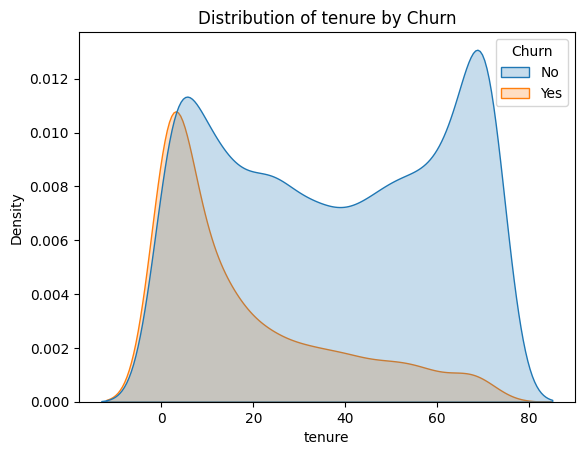

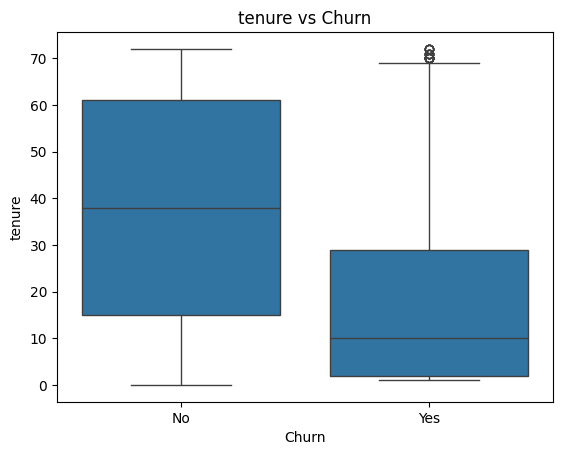

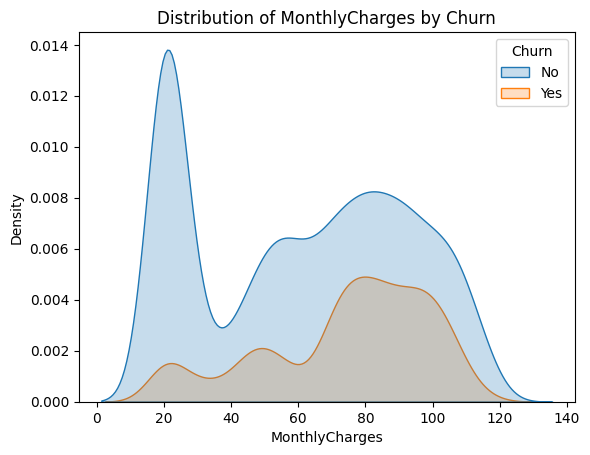

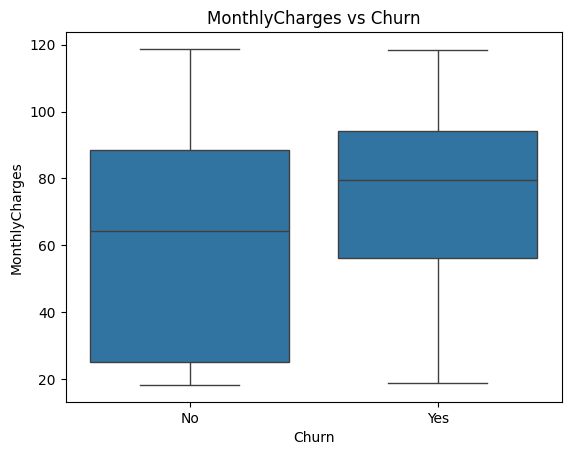

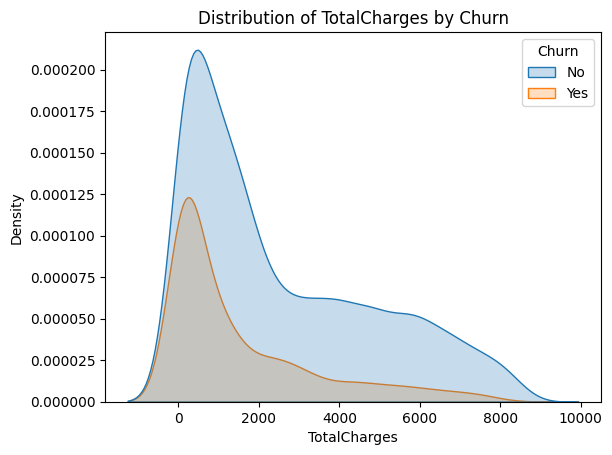

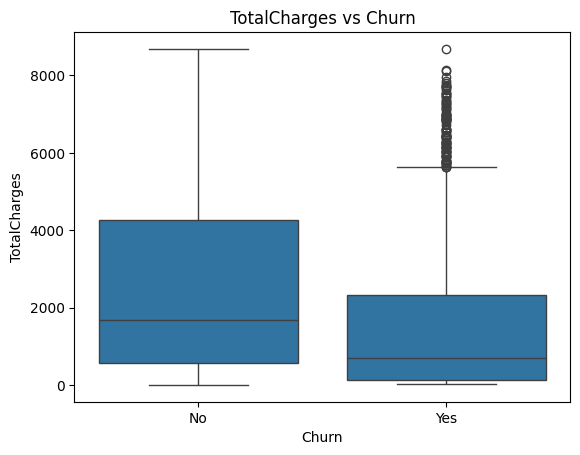

In [ ]:
for col in num_cols:
  num_bi_analysis(df1,col,"Churn")

Most customers **Churn** at the start of their tenure.

**BoxPlot** shows their are outliers for customers who **Churned**, have longer tenure.

For **Higher Monthly Charges**, customers **Churn** more.

For **Churned** Customers **Total Charges** are low as they **Churn** at start of their **Tenure**.

In [ ]:
def cat_bi_analysis(df,col,target):
  churn_rate = pd.crosstab(df[col], df[target], normalize='index') * 100
  ax = churn_rate.plot(kind='bar', stacked=True, edgecolor="black")
  plt.title(f"{target} % by {col}")
  plt.xlabel(col)
  plt.legend(title=target, loc="upper right")
  plt.ylabel("Percentage (%)")
  plt.xticks(rotation=90)
  for c in ax.containers:
        ax.bar_label(c, fmt="%.1f%%", label_type="center", fontsize=9, color="black")
  plt.show()

In [ ]:
cat_cols_filtered = cat_cols[:-1]
cat_cols_filtered

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

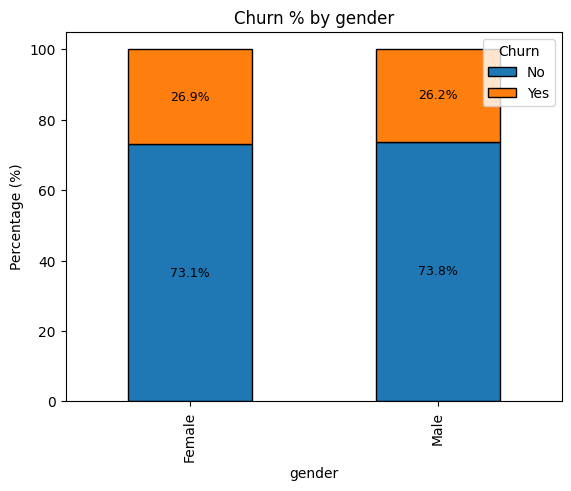

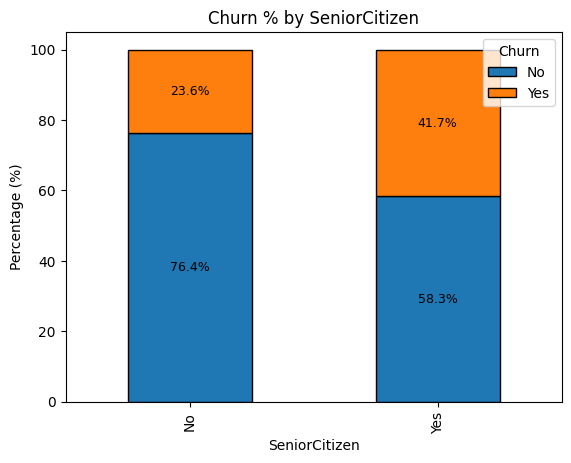

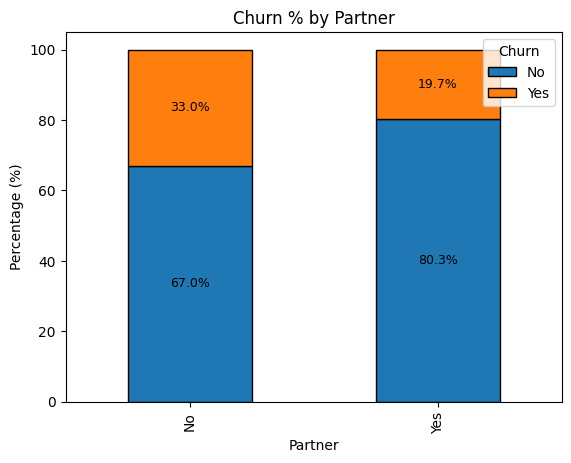

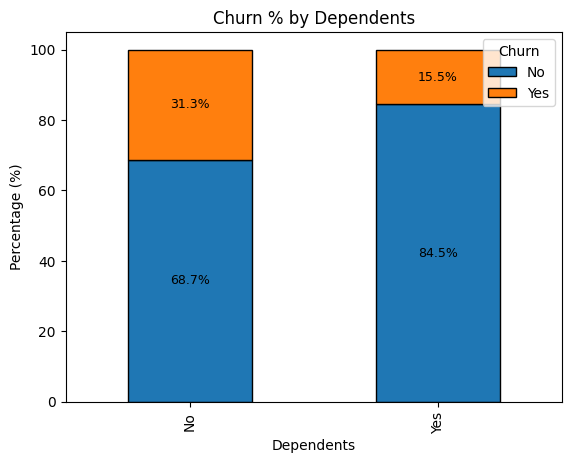

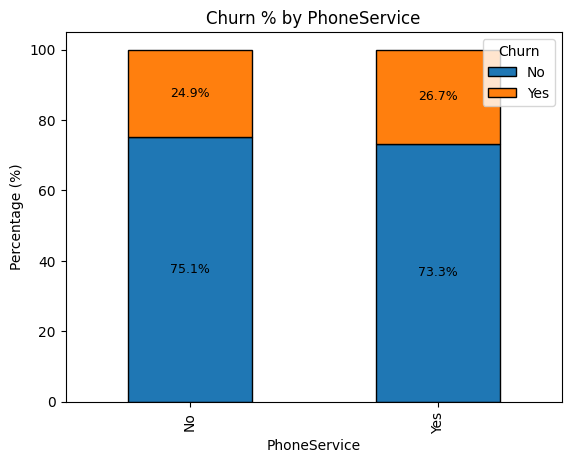

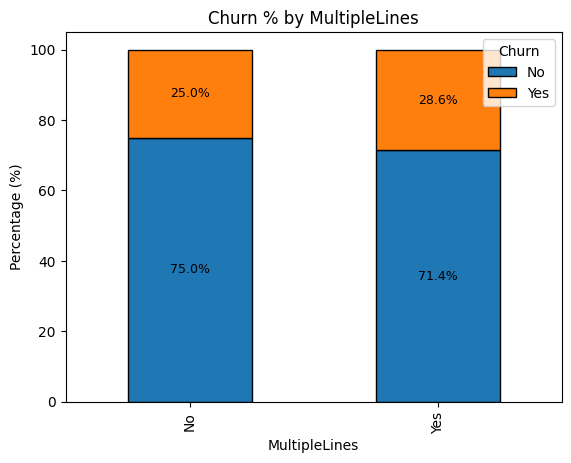

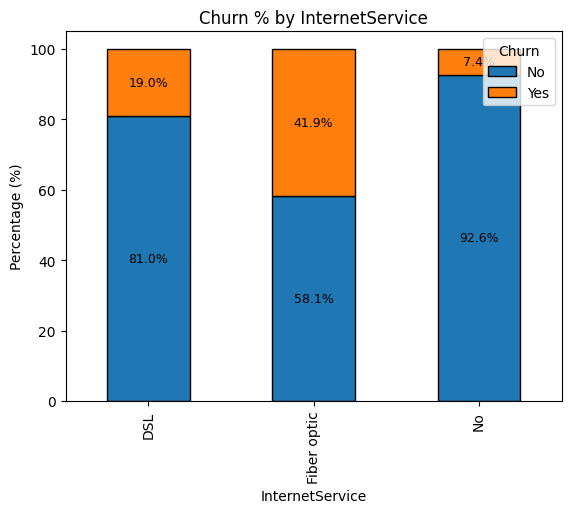

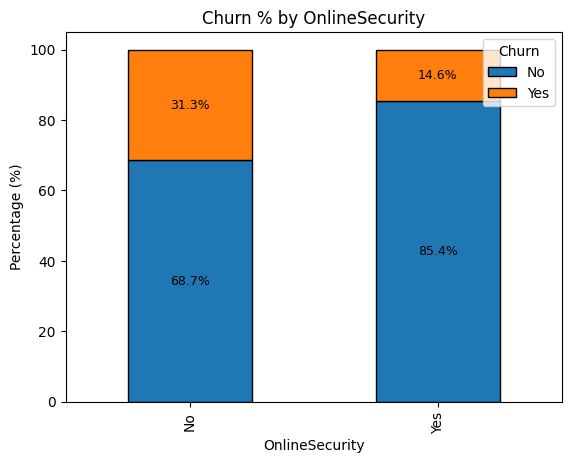

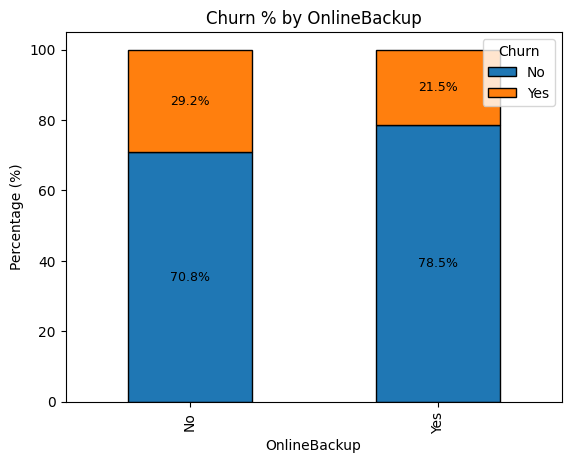

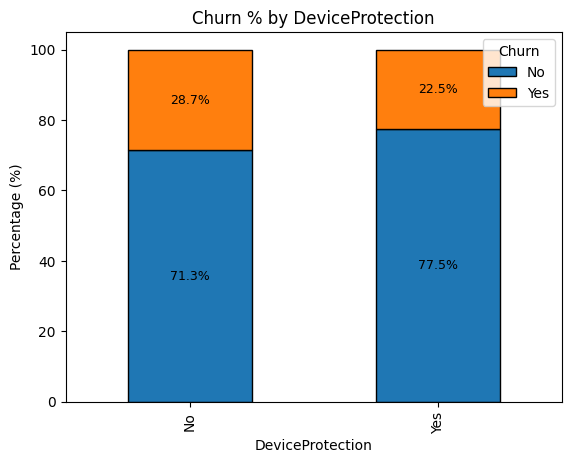

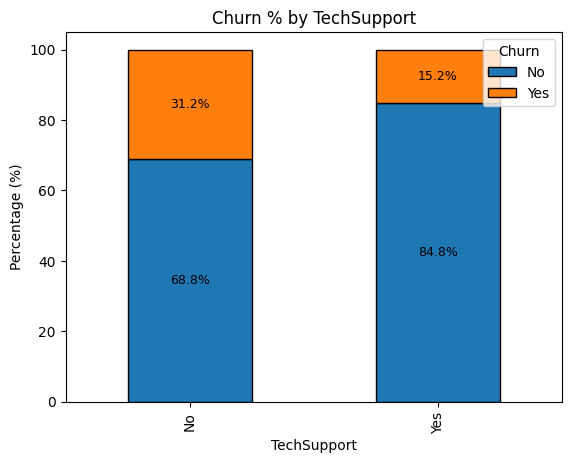

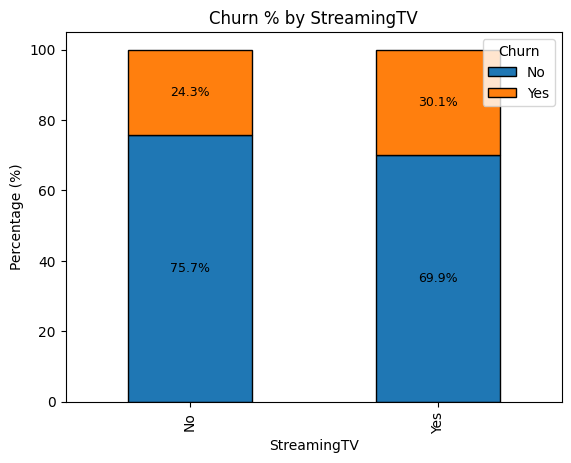

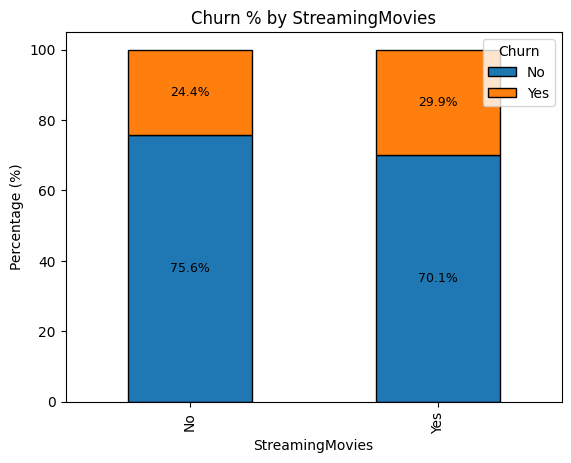

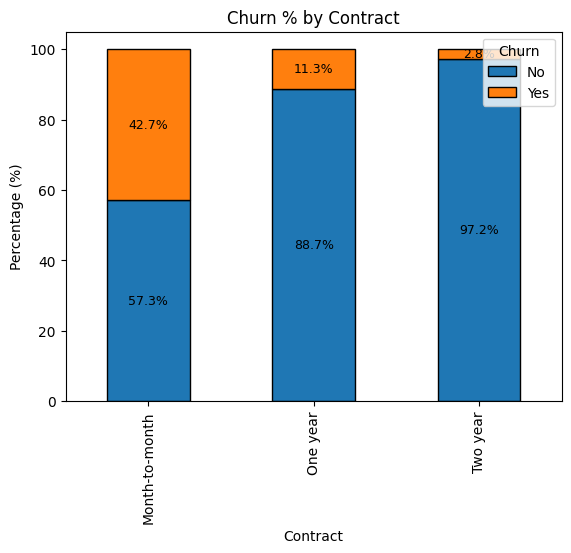

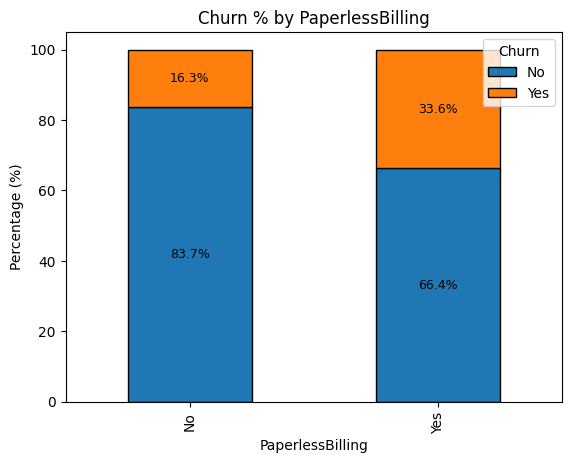

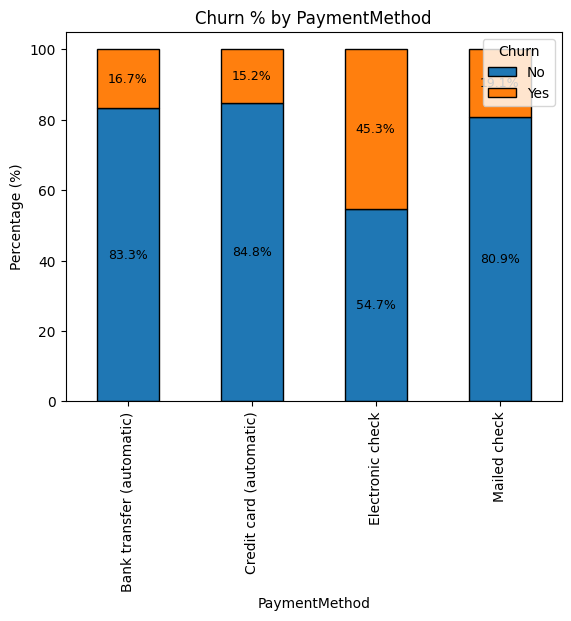

In [ ]:
for col in cat_cols_filtered:
  cat_bi_analysis(df1,col,"Churn")

**Gender** : Churn % for both genders almost equal.

**Senior Citizen** : Churn rate for senior citizens is higher (41.7%).

**Partner, Dependents** : Customers with no partner & dependents are high churners (33% & 31.3%).

**Phone Service** : Customers with Phone Service slightly churn more with 26.7% compared to no Phone Service 24.9%.

**Multiple Lines** : Customers with Multiple Lines churn more with 28.6%.

**Internet Service** : Customers who opted for Fiber Optics are high churners with 41.9% customers being churners.

**Online Security** : Customers with no online security churn more (31.3%).

**Online Backup** : Customers who have no online backup their churn % is 29.2%.

**Device Protection** : Churn rate for customers with no device protection is 28.7%.

**Tech Support** : Churn rate for customers with no tech support is 31.2%.

**Streaming TV** : Churn rate for customers who subscribe for streaming tv is 30.1%.

**Streaming Movies** : Churn rate for customers who subscribe for movie streaming is 29.9%.

**Contract** : Churn rate for customers who opt for month-to-month subscription have high churn ratio (42.7%) as compared to 1 or 2 year subscription.

**Paperless Billing** : Churn rate for customers who opt for paperless billing have high churn ratio (33.6%).

**Payment Method** : Churn rate for customers who opt for electronic check for payment have high churn ratio (45.3%).

<Axes: >

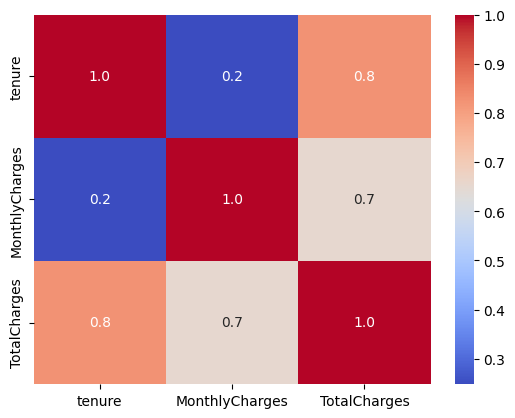

In [ ]:
corr = df1.corr(numeric_only=True)
sns.heatmap(data=corr, annot=True, cmap="coolwarm", fmt=".1f")

In [ ]:
X1 = df1[['tenure', 'TotalCharges']].copy()
X1 = add_constant(X1)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns
vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

print(vif_data)

        feature       VIF
0         const  2.759397
1        tenure  3.150308
2  TotalCharges  3.150308


### Data Preprocessing & Feature Engineering

In [ ]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df2 = df1.copy()

In [ ]:
binary_cols = ["gender", "SeniorCitizen", "Partner", "Dependents",
               "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup",
               "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
               "PaperlessBilling", "Churn"]

In [ ]:
for col in binary_cols:
  df2[col] = df1[col].map({"Yes": 1, "No": 0, "Male": 1, "Female": 0})

In [ ]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df2 = pd.get_dummies(df2, columns=["InternetService", "Contract", "PaymentMethod"], drop_first=True, dtype=int)

In [ ]:
df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [ ]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
X = df2.drop("Churn", axis=1)
y = df2['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    stratify = y,
    random_state = 42
)

In [ ]:
scaler = StandardScaler()
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.fit_transform(X_test[numeric_cols])

Applying SMOTE only on training set.

In [ ]:
print("Before SMOTE:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_res))

Before SMOTE: Counter({0: 4139, 1: 1495})
After SMOTE: Counter({0: 4139, 1: 4139})


In [ ]:
log_reg = LogisticRegression(
    class_weight="balanced",
    random_state=42,
    max_iter=1000
)

log_reg.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]

In [ ]:
print("Classification Report:\n", classification_report(y_test,y_pred))
print("ROC-AUC:", roc_auc_score(y_test,y_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409

ROC-AUC: 0.8349040274871476

Confusion Matrix:
 [[757 278]
 [ 80 294]]


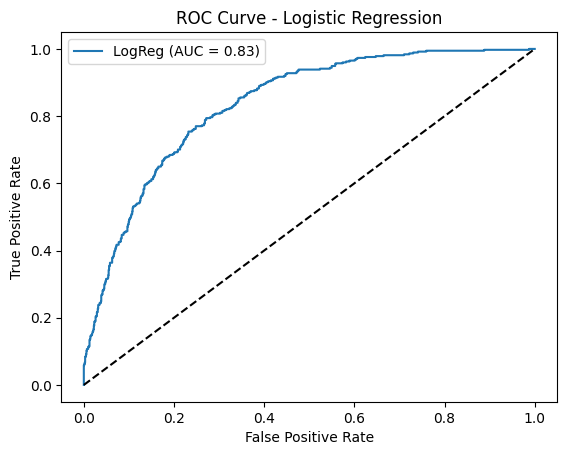

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="LogReg (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

**Accuracy** → Not enough (due to imbalance).

**Precision** → How many predicted churns are actual churns.

**Recall (Sensitivity)** → How many actual churns we detected (VERY important for churn).

**F1-score** → Balance between precision & recall.

**ROC-AUC** → Overall separability of churn vs non-churn.

For churn problems, Recall is usually most important (better to catch churners, even if a few false positives).

### Model Interpretation
**ROC-AUC** = **0.83**, Our model is separating churners vs non-churners pretty well.

**Recall** for churn (class 1) = **0.79**, That means the model is correctly identifying **79%** of churners.

**F1-score** **0.62** for churners, Not amazing, but decent given the trade-off between precision and recall.

**Precision** for churners (class 1) = **0.51**, About half of the predicted churns are false alarms. This could cause wasted effort in real business, e.g., calling customers who weren’t really going to churn.

Non-churn recall = **0.73** → The model misses **27%** of the non-churners.

[[757, 278], 757 True Negatives, 278 False Positives

 [ 80, 294]],   80 False Negatives, 294 True Positives

**False Positives** **278**, Predicted churn, but they actually stayed.

**False Negatives 80**, Predicted stay, but they actually churned (this is worse in business terms).

In [ ]:
dt_clf = DecisionTreeClassifier(
    max_depth=6,
    class_weight="balanced",
    random_state=42
)

In [ ]:
dt_clf.fit(X_train_res,y_train_res)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)

In [ ]:
y_pred_dt = dt_clf.predict(X_test)
y_proba_dt = dt_clf.predict_proba(X_test)[:,1]

In [ ]:
print("Decision Tree Classifier Report:\n", classification_report(y_test,y_pred_dt))
print("ROC-AUC Decision Tree", roc_auc_score(y_test,y_proba_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred_dt))

Decision Tree Classifier Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77      1035
           1       0.47      0.80      0.59       374

    accuracy                           0.71      1409
   macro avg       0.69      0.74      0.68      1409
weighted avg       0.79      0.71      0.72      1409

ROC-AUC Decision Tree 0.8189891239763362

Confusion Matrix:
 [[695 340]
 [ 74 300]]


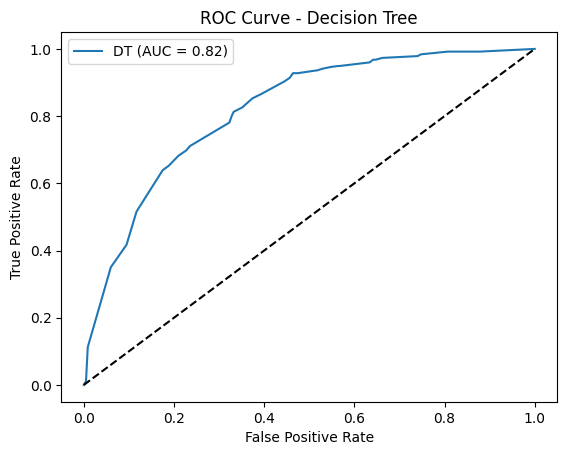

In [ ]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_proba_dt)
plt.plot(fpr_dt, tpr_dt, label="DT (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_dt)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

**Recall** for churners (class 1) = **0.80**, This means the tree is catching **80%** of churners, which is very strong for the business goal (better to identify at-risk customers).

**ROC-AUC** = 0.82, Quite solid, showing the model has decent discriminatory power.

**Precision** for churners = **0.47**, More than half of the predicted churners are false alarms.

Non-churn recall = **0.67**, The model misses **33%** of the customers who actually stayed.

[[695, 340], True Negatives, False Positives

 [ 74, 300]], False Negatives, True Positives

**False Positives (340)**: Predicted churn, but they didn’t.

**False Negatives (74)**: Predicted non-churn, but they did churn.
This is actually low (good news), meaning we’re not missing too many churners.

In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_clf.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [ ]:
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:,1]

In [ ]:
print("Random Forest Classifier Report:\n", classification_report(y_test,y_pred_rf))
print("ROC-AUC Random Forest", roc_auc_score(y_test,y_proba_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred_rf))

Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      1035
           1       0.55      0.67      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.77      1409

ROC-AUC Random Forest 0.8279624893435634

Confusion Matrix:
 [[826 209]
 [122 252]]


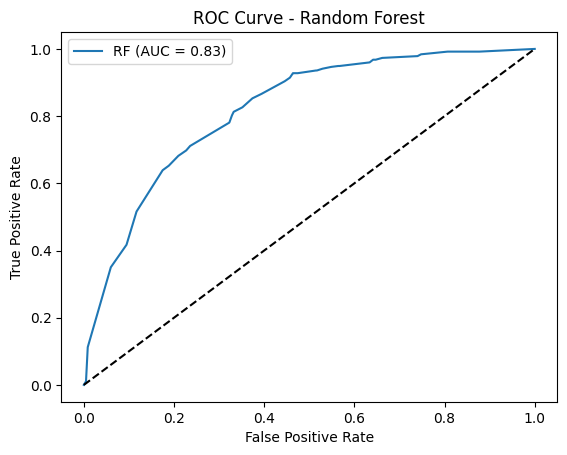

In [ ]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_dt, tpr_dt, label="RF (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_rf)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

**Accuracy** = **77%**, Higher than Decision Tree (71%) and slightly better than Logistic Regression (75%).

**ROC-AUC** = **0.83**, Best so far, showing Random Forest discriminates well between churn vs non-churn.

**Class 1 Recall (0.67)**, Better than Logistic Regression (0.79) but lower than Decision Tree (0.80). Still reasonable — catches **67%** of churners.

**Precision** = **0.55** is better than Decision Tree (0.47), meaning fewer false alarms.

**Churn precision** = **0.55**, Still moderate, meaning nearly half of predicted churners are actually non-churners.

[[826, 209], TN, FP

 [122, 252]], FN, TP

**252** true churners caught.

**209 false positives**: better than Decision Tree’s 340.

**122 false negatives**: worse than Decision Tree’s 74.

In [ ]:
xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,  # already balanced with SMOTE
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

In [ ]:
xgb_clf.fit(X_train_res, y_train_res)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:05:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:,1]

In [ ]:
print("XGBoost Classifier Report:\n", classification_report(y_test,y_pred_xgb))
print("ROC-AUC XGB", roc_auc_score(y_test,y_proba_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred_xgb))

XGBoost Classifier Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.75      0.76      1409

ROC-AUC XGB 0.8303598646309643

Confusion Matrix:
 [[760 275]
 [ 83 291]]


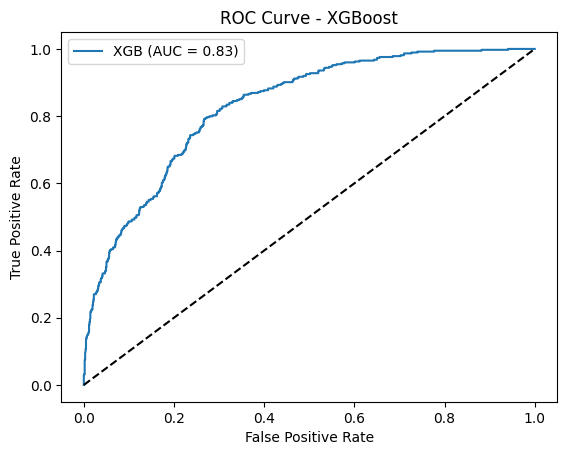

In [ ]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, label="XGB (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_xgb)))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

**Accuracy** = **75%**, Similar to Logistic Regression, lower than Random Forest (77%).

**ROC-AUC** = **0.83**, On par with Random Forest (0.8279), better than Decision Tree (0.819).

**Recall** = **0.78** → Almost as high as Logistic Regression (0.79) and Decision Tree (0.80), much better than Random Forest (0.67).

**Precision** = **0.51** → Similar to Logistic Regression (0.51), better than Decision Tree (0.47), lower than Random Forest (0.55).

[[760, 275], TN, FP

 [ 83, 291]], FN, TP

**XGBoost** caught 291 churners, very close to Logistic Regression (294), slightly lower than Decision Tree (300).

Fewer **false negatives** (83) than Random Forest (122), means it misses fewer churners.

More **false positives** (275) than Random Forest (209), but better recall makes this trade-off acceptable.

### Model Comparison Summary
| Model               | Accuracy | Precision (Churn) | Recall (Churn) | F1 (Churn) | ROC-AUC |
| ------------------- | -------- | ----------------- | -------------- | ---------- | ------- |
| Logistic Regression | **75%**  | 0.51              | **0.79**       | 0.62       | 0.835   |
| Decision Tree       | 71%      | 0.47              | **0.80**       | 0.59       | 0.819   |
| Random Forest       | **77%**  | **0.55**          | 0.67           | 0.60       | 0.828   |
| XGBoost             | 75%      | 0.51              | **0.78**       | 0.62       | 0.830   |


### Insights

If **recall** is the **business priority** (catching churners at all costs) → Logistic Regression / XGBoost / Decision Tree are better (all ~0.78–0.80 recall).

If **balance** is **preferred** (not wasting too much effort on false positives) → Random Forest is better (higher precision & accuracy).

**XGBoost** = **best trade-off** → High recall (0.78), competitive ROC-AUC (0.83), reasonable precision (0.51).

/tmp/ipython-input-1303359696.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dt_feat_imp, x="Importance", y="Feature", palette="viridis")


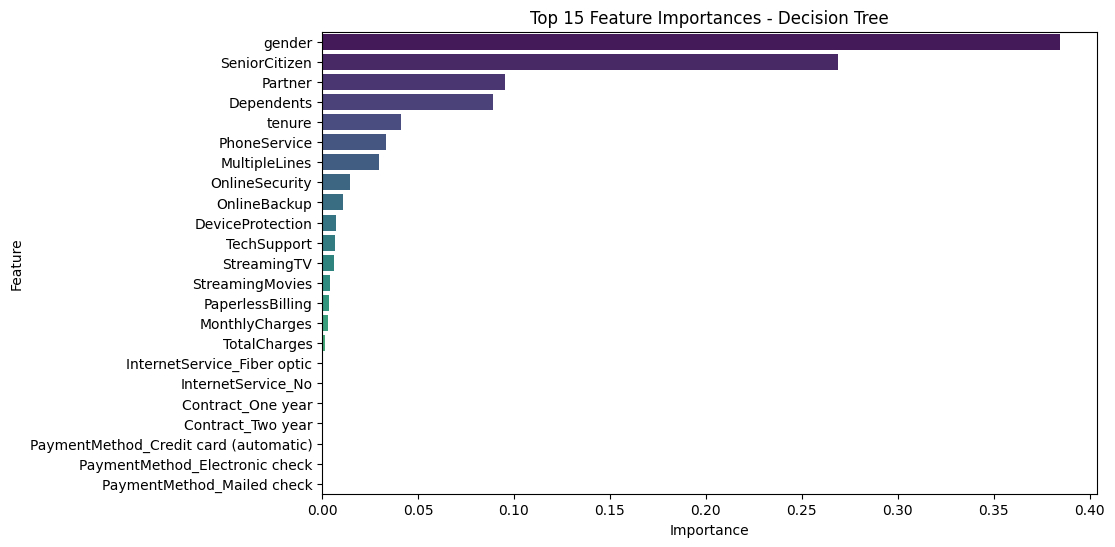

In [ ]:
# Decision Tree
dt_importances = pd.Series(dt_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
#print("Decision Tree Top Features:\n", dt_importances.head(10))
dt_feat_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dt_importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=dt_feat_imp, x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 Feature Importances - Decision Tree")
plt.show()

/tmp/ipython-input-1431155401.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_feat_imp, x="Importance", y="Feature", palette="viridis")


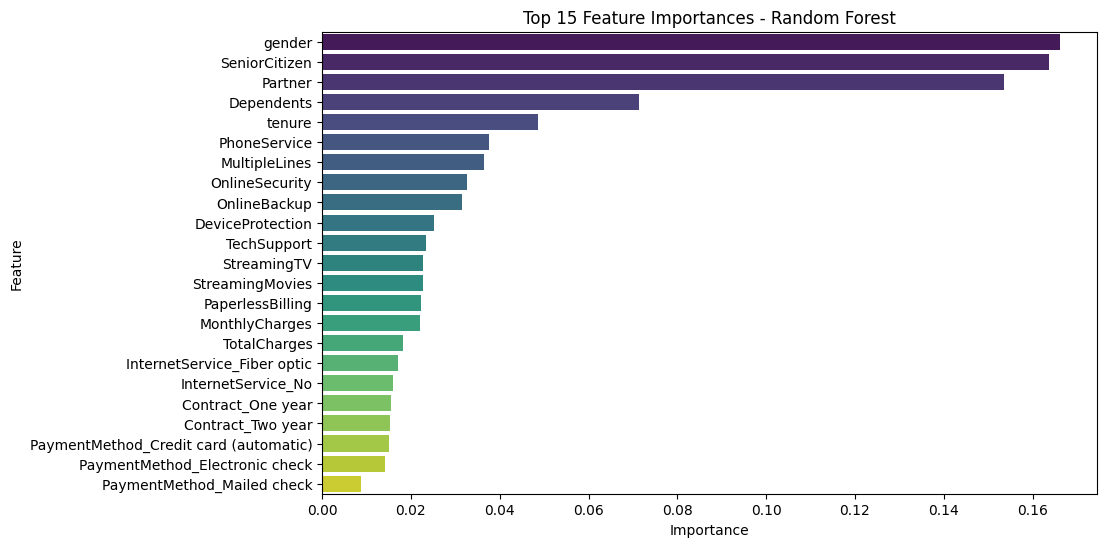

In [ ]:
# Random Forest
rf_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

rf_feat_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=rf_feat_imp, x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 Feature Importances - Random Forest")
plt.show()

/tmp/ipython-input-3875865149.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_feat_imp, x="Importance", y="Feature", palette="plasma")


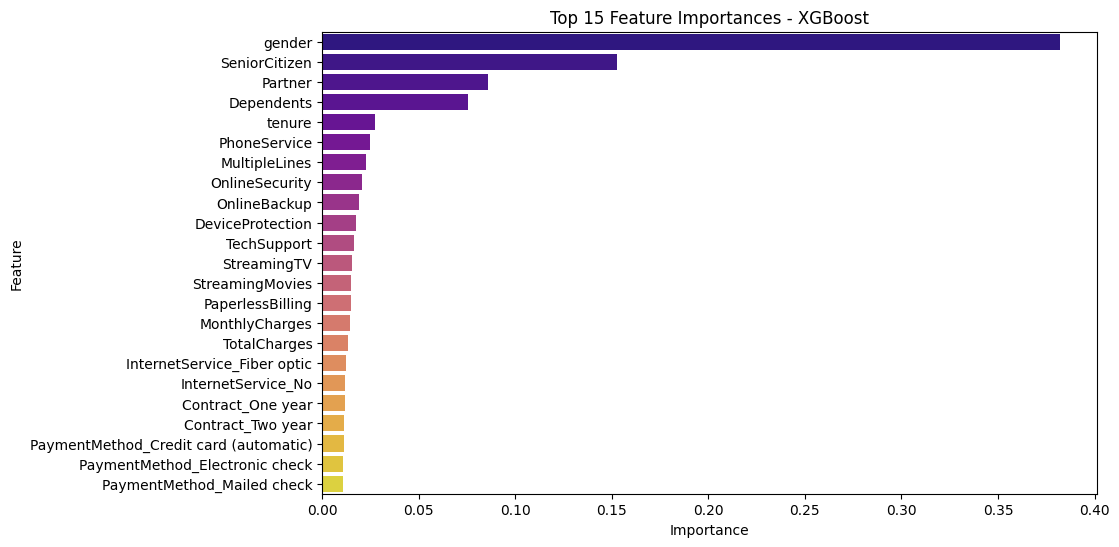

In [ ]:
# XGBoost
xgb_importances = pd.Series(xgb_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
xgb_feat_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xgb_importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=xgb_feat_imp, x="Importance", y="Feature", palette="plasma")
plt.title("Top 15 Feature Importances - XGBoost")
plt.show()

In [ ]:
print("Random Forest Top 10 Features:\n", rf_feat_imp.head(10))
print("\nXGBoost Top 10 Features:\n", xgb_feat_imp.head(10))

Random Forest Top 10 Features:
                                          Feature  Importance
tenure                                    gender    0.166190
MonthlyCharges                     SeniorCitizen    0.163654
TotalCharges                             Partner    0.153546
Contract_Two year                     Dependents    0.071401
InternetService_Fiber optic               tenure    0.048535
Contract_One year                   PhoneService    0.037618
OnlineSecurity                     MultipleLines    0.036454
TechSupport                       OnlineSecurity    0.032639
PaymentMethod_Electronic check      OnlineBackup    0.031416
gender                          DeviceProtection    0.025124

XGBoost Top 10 Features:
                                       Feature  Importance
Contract_Two year                      gender    0.382192
Contract_One year               SeniorCitizen    0.152778
InternetService_No                    Partner    0.086008
InternetService_Fiber optic        Dep

**Tenure & Charges**: Short-tenure, high-charge customers are high churn risks.

**Contract Type**: Month-to-month customers churn the most; long-term contracts reduce churn.

**Service Quality**: Lack of OnlineSecurity/TechSupport/Streaming services increases churn.

**Payment Method**: Electronic check (RF) and Mailed check (XGB) are linked with higher churn compared to automatic transfers.

### Hyperparameter Tuning using Randomized Search CV

In [ ]:
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],   # number of trees
    'max_depth': [None, 5, 10, 20],         # depth of each tree
    'min_samples_split': [2, 5, 10],        # minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],          # minimum samples at a leaf node
    'max_features': ['sqrt', 'log2'],       # number of features to consider at each split
    'class_weight': ['balanced', None]      # handle imbalance
}

rf_clf_cv = RandomForestClassifier(random_state=42)

In [ ]:
rf_random_search = RandomizedSearchCV(
    estimator=rf_clf_cv,
    param_distributions=rf_param_grid,
    n_iter=10,                # number of random combinations to try
    cv=5,                     # 5-fold cross-validation
    scoring='roc_auc',        # optimize ROC-AUC (important for churn)
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_random_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [ ]:
print("Best Parameters:", rf_random_search.best_params_)

Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'class_weight': 'balanced'}


In [ ]:
best_rf = rf_random_search.best_estimator_

In [ ]:
y_pred_rf_cv = best_rf.predict(X_test)
y_prob_rf_cv = best_rf.predict_proba(X_test)[:,1]

In [ ]:
print("Random Forest Classifier Report:\n", classification_report(y_test,y_pred_rf_cv))
print("ROC-AUC Random Forest", roc_auc_score(y_test,y_prob_rf_cv))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred_rf_cv))

Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.55      0.70      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409

ROC-AUC Random Forest 0.8328773670205896

Confusion Matrix:
 [[821 214]
 [112 262]]


**Recall** improved (**0.67 → 0.70**) → means the tuned model catches more churners.

**F1-score** improved (**0.60 → 0.62**) → better balance of precision & recall.

**ROC-AUC** improved (**0.828 → 0.833**) → stronger overall classification capability.

Slight trade-off: a few more false positives (214 vs 209).

In [ ]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 500],      # number of boosting rounds
    'max_depth': [3, 5, 7, 10],                # tree depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # step size shrinkage
    'subsample': [0.6, 0.8, 1.0],              # fraction of samples
    'colsample_bytree': [0.6, 0.8, 1.0],       # fraction of features
    'gamma': [0, 1, 5],                        # min loss reduction
    'scale_pos_weight': [1, 2, 3]              # handle imbalance
}

In [ ]:
xgb_clf_cv = XGBClassifier(
    objective='binary:logistic',
    eval_metric=["auc", "logloss"],
    use_label_encoder=False,
    random_state=42
)

In [ ]:
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_clf_cv,
    param_distributions=xgb_param_grid,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
xgb_random_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:17:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=['auc', 'logloss'],
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interact...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 500],
                                        'scale_pos_weight': [1, 2, 3],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [ ]:
print("Best Parameters:", xgb_random_search.best_params_)

Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 3, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 1.0}


In [ ]:
best_xgb = xgb_random_search.best_estimator_

In [ ]:
y_pred_xgb_cv = best_xgb.predict(X_test)
y_prob_xgb_cv = best_xgb.predict_proba(X_test)[:,1]

In [ ]:
print("XGBoost Classifier Report:\n", classification_report(y_test,y_pred_xgb_cv))
print("ROC-AUC XGBoost", roc_auc_score(y_test,y_prob_xgb_cv))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred_xgb_cv))

XGBoost Classifier Report:
               precision    recall  f1-score   support

           0       0.92      0.69      0.78      1035
           1       0.49      0.82      0.61       374

    accuracy                           0.72      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.80      0.72      0.74      1409

ROC-AUC XGBoost 0.8206734867860187

Confusion Matrix:
 [[711 324]
 [ 66 308]]


**Accuracy** dropped slightly (0.75 → 0.72).

**Precision** (Class 1) dropped a little (0.51 → 0.49).

**Recall** (Class 1) improved slightly (0.78 → 0.82) → tuned model is catching more churners.

**F1-score** (Class 1) is almost the same (0.62 → 0.61).

**ROC-AUC** is slightly lower (0.83 → 0.82).

**Confusion matrix** shows **more false positives** in the tuned model (324 vs 275), but **fewer false negatives** (66 vs 83).

In [ ]:
def threshold_tuning(model, X_test, y_test, model_name="Model"):
    # Get probabilities
    y_probs = model.predict_proba(X_test)[:,1]

    # Precision-Recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

    # Compute F1 for each threshold
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

    # Best threshold by F1-score
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]
    best_f1 = f1_scores[best_idx]

    print(f"\n🔹 {model_name} - Best Threshold: {best_threshold:.2f}, Best F1: {best_f1:.4f}")

    # Predictions with best threshold
    y_pred_best = (y_probs >= best_threshold).astype(int)

    # Classification report
    print(f"Classification Report ({model_name} @ {best_threshold:.2f}):")
    print(classification_report(y_test, y_pred_best))

    # Plot Precision-Recall curve
    plt.figure(figsize=(7,5))
    plt.plot(thresholds, precisions[:-1], label="Precision")
    plt.plot(thresholds, recalls[:-1], label="Recall")
    plt.plot(thresholds, f1_scores[:-1], label="F1 Score")
    plt.axvline(best_threshold, color="red", linestyle="--", label=f"Best Threshold={best_threshold:.2f}")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(f"Threshold Tuning - {model_name}")
    plt.legend()
    plt.show()

    return best_threshold


🔹 Random Forest - Best Threshold: 0.45, Best F1: 0.6242
Classification Report (Random Forest @ 0.45):
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1035
           1       0.54      0.75      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



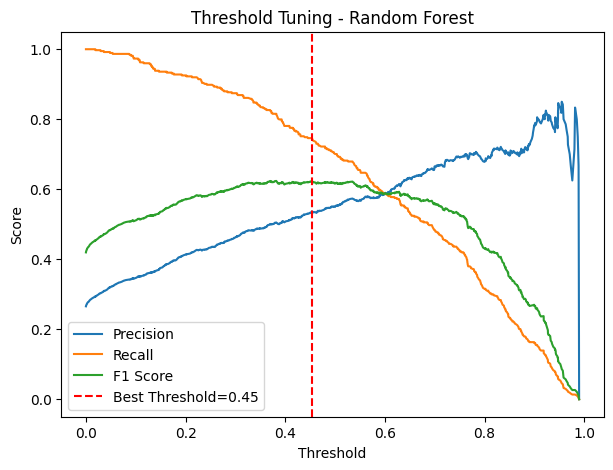

In [ ]:
best_thresh_rf = threshold_tuning(best_rf, X_test, y_test, model_name="Random Forest")


🔹 XGBoost - Best Threshold: 0.72, Best F1: 0.6211
Classification Report (XGBoost @ 0.72):
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.52      0.76      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



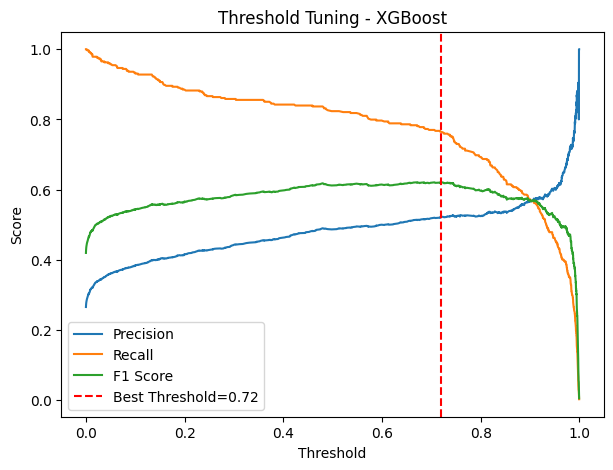

In [ ]:
best_thresh_xgb = threshold_tuning(best_xgb, X_test, y_test, model_name="XGBoost")

In [ ]:
joblib.dump(best_rf, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(0.45, "best_threshold.pkl")

['best_threshold.pkl']